# R4 External Lab : Validation Accuracy 
# Submitted by : Nitin Gupta

In [ ]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

### Read the input file and check the data dimension

In [3]:
data = pd.read_csv("german_credit.csv")

In [4]:
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [6]:
#Check data info to identify attributes, datatypes, rec count, null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [7]:
#finding unique data in data set.
data.apply(lambda x: len(x.unique()))

default                         2
account_check_status            4
duration_in_month              33
credit_history                  5
purpose                        10
credit_amount                 921
savings                         5
present_emp_since               5
installment_as_income_perc      4
personal_status_sex             4
other_debtors                   3
present_res_since               4
property                        4
age                            53
other_installment_plans         3
housing                         3
credits_this_bank               4
job                             4
people_under_maintenance        2
telephone                       2
foreign_worker                  2
dtype: int64

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [10]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable
data.shape

(1000, 21)

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [11]:
x_train, x_test,  = train_test_split(data, test_size=0.5, random_state=42)
x_train.shape, x_test.shape

((500, 21), (500, 21))

In [12]:
categorical_columns = ['account_check_status', 'credit_history', 'purpose','savings','present_emp_since','personal_status_sex',
                      'other_debtors', 'property', 'other_installment_plans','housing', 'job','telephone','foreign_worker']

In [13]:
# Lets build a Ensemble model but need to modify the dataset first
dummies_df = x_train
for attr in categorical_columns:
    dummies_df = dummies_df.merge(pd.get_dummies(dummies_df[attr], prefix=attr), left_index=True, right_index=True)
    dummies_df.drop(attr,axis=1,inplace=True)

In [14]:
dummies_df.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
680,0,6,1538,1,2,56,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
177,0,6,338,4,4,52,2,1,0,1,...,1,0,0,1,0,0,1,0,0,1
395,0,39,11760,2,3,32,1,1,1,0,...,0,1,0,1,0,0,0,1,0,1
911,1,24,4736,2,4,25,1,1,1,0,...,1,0,0,0,0,1,1,0,0,1
793,0,24,2892,3,4,51,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [16]:
# Print Shape of model data
dummies_df.shape

(500, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [17]:
dummies_df.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.203169,0.176431,0.081113,-0.018102,-0.154603,-0.086324,0.005404,0.120761,0.248517,...,-0.168393,0.080469,0.029833,0.016415,0.048346,-0.065466,0.086696,-0.086696,-0.058429,0.058429
duration_in_month,0.203169,1.000000,0.638455,0.002182,0.060089,-0.034332,-0.057281,0.000036,0.096800,-0.031610,...,-0.106254,-0.088710,0.153021,0.058363,-0.021477,-0.204670,-0.203342,0.203342,-0.127584,0.127584
credit_amount,0.176431,0.638455,1.000000,-0.316062,0.055580,0.037955,0.025802,0.058919,0.177652,-0.084051,...,-0.121039,-0.034145,0.335841,-0.104910,0.017523,-0.188484,-0.320196,0.320196,-0.019427,0.019427
installment_as_income_perc,0.081113,0.002182,-0.316062,1.000000,0.046936,0.037686,0.011055,-0.065571,-0.118042,0.064318,...,0.036783,-0.071073,-0.020496,0.101987,-0.111098,-0.064594,0.008860,-0.008860,-0.087614,0.087614
present_res_since,-0.018102,0.060089,0.055580,0.046936,1.000000,0.290390,0.149001,0.106283,-0.031966,0.042936,...,-0.265536,0.141388,0.034232,0.014311,-0.065928,-0.024733,-0.100532,0.100532,-0.001189,0.001189
age,-0.154603,-0.034332,0.037955,0.037686,0.290390,1.000000,0.161426,0.135444,-0.086384,-0.057166,...,-0.036582,-0.192163,0.146798,-0.097797,-0.034131,-0.003501,-0.168735,0.168735,0.017495,-0.017495
credits_this_bank,-0.086324,-0.057281,0.025802,0.011055,0.149001,0.161426,1.000000,0.126513,-0.044397,-0.017993,...,0.026694,-0.051833,0.006707,-0.002648,0.009872,-0.006607,-0.047048,0.047048,-0.008946,0.008946
people_under_maintenance,0.005404,0.000036,0.058919,-0.065571,0.106283,0.135444,0.126513,1.000000,-0.050669,0.067415,...,-0.079418,-0.056599,0.028740,-0.071705,-0.057463,0.082278,-0.046807,0.046807,0.054501,-0.054501
account_check_status_0 <= ... < 200 DM,0.120761,0.096800,0.177652,-0.118042,-0.031966,-0.086384,-0.044397,-0.050669,1.000000,-0.373548,...,-0.047488,0.042831,0.033608,-0.114695,0.089537,0.075975,-0.000578,0.000578,-0.071986,0.071986
account_check_status_< 0 DM,0.248517,-0.031610,-0.084051,0.064318,0.042936,-0.057166,-0.017993,0.067415,-0.373548,1.000000,...,-0.105420,0.079699,-0.003457,0.002558,0.063998,-0.023580,0.131816,-0.131816,0.102339,-0.102339


### Drop the original variables which are converted to dummy

In [18]:
#it is alreday handled with df.merge() function above

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [19]:
X = dummies_df.drop('default', axis=1)
Y = dummies_df['default']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
x_train.shape, y_train.shape

((350, 61), (350,))

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score , mean_squared_error, roc_auc_score, roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score


In [29]:
rf_model = RandomForestClassifier(n_estimators=500, criterion='entropy', n_jobs=2,random_state=9999 )

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [30]:
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

In [31]:
print(rf_model.__class__.__name__,' :Accuracy_Score:', accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred)) 
print('MSE', mean_squared_error(y_test, y_pred)) 
print('--------------------------------------------')

RandomForestClassifier  :Accuracy_Score: 0.76
[[99  4]
 [32 15]]
MSE 0.24
--------------------------------------------


### Q6 Show the list of the features importance( 1 Marks)

In [32]:
importances = rf_model.feature_importances_
importances

array([0.07183852, 0.10176338, 0.03820459, 0.03415921, 0.07965199,
       0.01925808, 0.0086708 , 0.01845132, 0.02941584, 0.00817624,
       0.04644292, 0.00821088, 0.02324519, 0.0087818 , 0.0153012 ,
       0.01128955, 0.01145633, 0.01244491, 0.01357282, 0.00788771,
       0.01437221, 0.00173171, 0.0026582 , 0.01191795, 0.00221281,
       0.00173588, 0.0058173 , 0.01704484, 0.00784575, 0.00712811,
       0.01258909, 0.01586937, 0.01433413, 0.01469454, 0.01105271,
       0.00761008, 0.01773285, 0.00504989, 0.00858132, 0.01617401,
       0.00527902, 0.00421593, 0.00740122, 0.01214432, 0.01533376,
       0.02031697, 0.00934584, 0.01626858, 0.01384589, 0.00340468,
       0.00792562, 0.02203615, 0.01325797, 0.01064009, 0.01774365,
       0.00287317, 0.01113021, 0.01699955, 0.01827837, 0.00353218,
       0.00365079])

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [34]:
# Use below values
num_folds = 10
seed = 77

In [35]:
#Validate the Random Forest model build above using k fold

In [36]:
kfold = KFold(10, True, random_state=77)
for train, test in kfold.split(X,Y):
    print('train: %s, test: %s' % (train, test)) 

train: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  18  19  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  47  48  49  50  51  53  54  55  56  57  58  59  60  61
  62  63  66  67  68  69  70  71  72  74  75  76  78  79  80  81  82  83
  84  85  86  88  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 107 108 109 110 111 112 113 114 115 116 117 118 120 121 122 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 146 147 148 149 150 152 153 156 157 158 159 161 162 163 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 228 229 230 231 232 233 235 236 239 240 241 242 243 244
 245 247 248 250 251 253 254 255 256 257 258 259 260 261 262 263 265 266
 267 268 269 270 271 273 274 275 276 277 278

In [38]:
X1 = dummies_df.drop('default', axis=1)
y = dummies_df['default']

In [39]:
kfold = KFold(n_splits=10, random_state=77, shuffle=True)
score_array =[]
for train_index,test_index in kfold.split(X1):
    print(train_index,test_index)
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    clf_kf=rf_model.fit(X1_train, y1_train)
    y_pred_kf = rf_model.predict(X1_test)
    score_array.append(precision_recall_fscore_support(y1_test, y_pred_kf, average=None))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  18  19  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  47  48  49  50  51  53  54  55  56  57  58  59  60  61
  62  63  66  67  68  69  70  71  72  74  75  76  78  79  80  81  82  83
  84  85  86  88  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 107 108 109 110 111 112 113 114 115 116 117 118 120 121 122 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 146 147 148 149 150 152 153 156 157 158 159 161 162 163 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 228 229 230 231 232 233 235 236 239 240 241 242 243 244
 245 247 248 250 251 253 254 255 256 257 258 259 260 261 262 263 265 266
 267 268 269 270 271 273 274 275 276 277 278 279 28

[  0   2   3   4   6   7   8  10  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  41  42  43  44  45  46  47  48  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  75  77  78  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 116 117 118 119
 120 121 122 123 124 125 126 128 129 130 131 132 133 134 135 136 137 138
 139 141 142 143 144 145 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 162 163 164 165 166 167 168 169 170 171 172 173 175 176 177 178
 179 180 181 182 184 185 186 187 188 189 190 191 192 193 195 196 197 198
 199 201 202 203 204 205 206 207 208 209 211 212 213 214 215 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 234 235 236 237 238
 240 241 243 244 245 246 247 248 249 251 252 254 255 257 258 259 260 261
 262 263 264 265 267 268 269 271 272 273 274 275 27

In [40]:
results = cross_val_score(rf_model, X1_train, y1_train, cv=kfold)
print(results.mean())

0.7533333333333333


In [44]:
#Calculate Mean score

In [45]:
mean_score = np.mean(score_array,axis=0)
mean_score

array([[ 0.77056716,  0.65577922],
       [ 0.90890698,  0.38882387],
       [ 0.83231286,  0.48088896],
       [34.7       , 15.3       ]])

In [46]:
# Calculate score standard deviation using std()

In [47]:
mean_score.std()

11.597961425721733

# Q8 Print the confusion matrix( 1 Marks)

In [49]:
metrics.confusion_matrix(y1_test, y_pred_kf)

array([[32,  3],
       [ 9,  6]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [52]:
precision_recall_fscore_support(y1_test, y_pred_kf)
print(classification_report(y1_test, y_pred_kf))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.67      0.40      0.50        15

   micro avg       0.76      0.76      0.76        50
   macro avg       0.72      0.66      0.67        50
weighted avg       0.75      0.76      0.74        50



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

In [54]:
# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

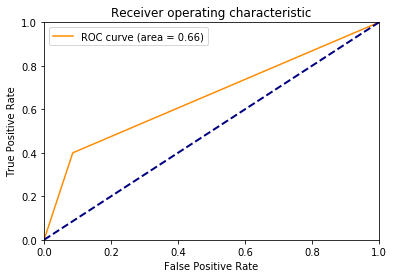

In [55]:
get_roc (y1_test, y_pred_kf)

In [56]:
    fpr, tpr, _ = roc_curve(y1_test, y_pred_kf)
    roc_auc = auc(fpr, tpr)

In [57]:
print(fpr,tpr)

[0.         0.08571429 1.        ] [0.  0.4 1. ]


ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
